In [1]:
%matplotlib inline

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
import random as rnd

In [3]:
# Read atmospheric forcing

NumTensemble = 600
Tlen = 651

#fname = "../MAGICC/RCP2500/Temp_RCP26_HistConstraint.dat" # File to read
#df = pd.read_csv(fname,sep='\s+',index_col=0,header=None)
#df.columns.name = "ensemble member"
#df.index.name = "Time"
#T = np.array(df.values)

fname = "../MAGICC/RCP2500/Temp_RCP26_HistConstraint.dat" # File to read
df = pd.read_csv(fname,sep='\s+',index_col=0,header=None)
df.columns.name = "ensemble member"
df.index.name = "Time"
SAT = np.array(df.values)

print(len(SAT[:,1]))
# SAT[time,ensemblemember]

651


In [4]:
# Normalize and crop temperature series
Temp = []
Tavebeg = 0
Taveend = 80
tbeg = 51
tend = 251
for i in range(len(SAT[1,:])):
    SATave = np.mean(SAT[Tavebeg:Taveend,i])
    SAT[:,i] = SAT[:,i]-SATave
SAT = SAT[tbeg:tend,:]

In [5]:
# Read ocean scaling

NumOmodel = 19

fname = "../ScalingCoefficients/OceanScaling/OS_R1.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R1 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R1 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R1 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R1)
#print(OS_WiDelay_R1)
#print(OS_Delay_R1)

fname = "../ScalingCoefficients/OceanScaling/OS_R2.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R2 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R2 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R2 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R2)
#print(OS_WiDelay_R2)
#print(OS_Delay_R2)

fname = "../ScalingCoefficients/OceanScaling/OS_R3.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R3 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R3 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R3 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R3)
#print(OS_WiDelay_R3)
#print(OS_Delay_R3)

fname = "../ScalingCoefficients/OceanScaling/OS_R4.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R4 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R4 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R4 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R4)
#print(OS_WiDelay_R4)
#print(OS_Delay_R4)

In [6]:
# Read melting sensitivity
fname = "../ScalingCoefficients/MeltSensitivity/MeltSensitivity.dat" # File to read
with open(fname) as f:
    MeltSensitivity = np.array([float(row) for row in f])

#print(MS)
#print("Lower limit of melt sensitivity: ",MS[0])
#print("Upper limit of melt sensitivity: ",MS[1])

In [7]:
# ISSM_UCI = ISSM_UCI
# Read ice scaling
fname = "../ScalingCoefficients/IceScaling/ES_ISSM_UCI_scaledto08.dat" # File to read
with open(fname) as f:
    FS_ISSM_UCI_BM08 = np.array([float(row) for row in f])

#print(FS_ISSM_UCI_BM08)
#print("ice scaling R0 = ",round(FS_ISSM_UCI_BM08[0],2))
#print("ice scaling R1 = ",round(FS_ISSM_UCI_BM08[1],2))
#print("ice scaling R2 = ",round(FS_ISSM_UCI_BM08[2],2))
#print("ice scaling R3 = ",round(FS_ISSM_UCI_BM08[3],2))
#print("ice scaling R4 = ",round(FS_ISSM_UCI_BM08[4],2))
#print("ice scaling R5 = ",round(FS_ISSM_UCI_BM08[5],2))

In [8]:
# ISSM_UCI = ISSM_UCI
# Read response functions

fname = "../RFunctions/RF_ISSM_UCI_BM08_R1.dat" # File to read
with open(fname) as f:
    RF_ISSM_UCI_BM08_R1 = np.array([float(row) for row in f])

fname = "../RFunctions/RF_ISSM_UCI_BM08_R2.dat" # File to read
with open(fname) as f:
    RF_ISSM_UCI_BM08_R2 = np.array([float(row) for row in f])

fname = "../RFunctions/RF_ISSM_UCI_BM08_R3.dat" # File to read
with open(fname) as f:
    RF_ISSM_UCI_BM08_R3 = np.array([float(row) for row in f])

fname = "../RFunctions/RF_ISSM_UCI_BM08_R4.dat" # File to read
with open(fname) as f:
    RF_ISSM_UCI_BM08_R4 = np.array([float(row) for row in f])

fname = "../RFunctions/RF_ISSM_UCI_BM08_R5.dat" # File to read
with open(fname) as f:
    RF_ISSM_UCI_BM08_R5 = np.array([float(row) for row in f])


In [9]:
EnsembleSize = 20000
scaled_forcing = False

countR1 = 0
countR2 = 0
countR3 = 0
countR4 = 0

SL_wTd_nos_base_ISSM_UCI_R1_RCP26 = [0] * (tend-tbeg)
SL_wTd_nos_base_ISSM_UCI_R2_RCP26 = [0] * (tend-tbeg)
SL_wTd_nos_base_ISSM_UCI_R3_RCP26 = [0] * (tend-tbeg)
SL_wTd_nos_base_ISSM_UCI_R4_RCP26 = [0] * (tend-tbeg)
SL_wTd_nos_base_ISSM_UCI_R5_RCP26 = [0] * (tend-tbeg)

for i in range(EnsembleSize):

    # Select forcing randomly

    # select global warming path
    iTens = rnd.randint(0,NumTensemble-1)
    Temp = np.array(SAT[:,iTens])

    # select ocean model
    iOmod = rnd.randint(0,NumOmodel-1)
    OS_R1 = OS_WiDelay_R1[iOmod]
    OS_R2 = OS_WiDelay_R2[iOmod]
    OS_R3 = OS_WiDelay_R3[iOmod]
    OS_R4 = OS_WiDelay_R4[iOmod]
    OS_R5 = OS_WiDelay_R4[iOmod]

    tau_R1 = int(OS_Delay_R1[iOmod])
    tau_R2 = int(OS_Delay_R2[iOmod])
    tau_R3 = int(OS_Delay_R3[iOmod])
    tau_R4 = int(OS_Delay_R4[iOmod])
    tau_R5 = int(OS_Delay_R4[iOmod])

    if tau_R1>0:
        countR1 = countR1+1
    if tau_R2>0:
        countR2 = countR2+1
    if tau_R3>0:
        countR3 = countR3+1
    if tau_R4>0:
        countR4 = countR4+1
    
    Temp_R1 = np.append(np.zeros(tau_R1),Temp[:tend-tbeg-tau_R1])
    Temp_R2 = np.append(np.zeros(tau_R2),Temp[:tend-tbeg-tau_R2])
    Temp_R3 = np.append(np.zeros(tau_R3),Temp[:tend-tbeg-tau_R3])
    Temp_R4 = np.append(np.zeros(tau_R4),Temp[:tend-tbeg-tau_R4])
    Temp_R5 = np.append(np.zeros(tau_R5),Temp[:tend-tbeg-tau_R5])
    
    # select melting sensitivity
    MS_R1 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R2 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R3 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R4 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R5 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])

    # Compose forcing time series
    M_R1 = MS_R1*OS_R1*Temp_R1
    M_R2 = MS_R2*OS_R2*Temp_R2
    M_R3 = MS_R3*OS_R3*Temp_R3
    M_R4 = MS_R4*OS_R4*Temp_R4
    M_R5 = MS_R5*OS_R5*Temp_R5

    M_R1[M_R1 < 0.0] = 0.0
    M_R2[M_R2 < 0.0] = 0.0
    M_R3[M_R3 < 0.0] = 0.0
    M_R4[M_R4 < 0.0] = 0.0
    M_R5[M_R5 < 0.0] = 0.0
    
    # Scaling of forcing
    if (scaled_forcing == True):
        for i in range(len(M_R1)):
            if M_R1[i] > 0.0:
                dump = np.log(M_R1[i]/8)/np.log(2.0)
                M_R1[i] = M_R1[i] * FS_ISSM_UCI_BM08[1]**dump
            if M_R2[i] > 0.0:
                dump = np.log(M_R2[i]/8)/np.log(2.0)
                M_R2[i] = M_R2[i] * FS_ISSM_UCI_BM08[2]**dump
            if M_R3[i] > 0.0:
                dump = np.log(M_R3[i]/8)/np.log(2.0)
                M_R3[i] = M_R3[i] * FS_ISSM_UCI_BM08[3]**dump
            if M_R4[i] > 0.0:
                dump = np.log(M_R4[i]/8)/np.log(2.0)
                M_R4[i] = M_R4[i] * FS_ISSM_UCI_BM08[4]**dump
            if M_R5[i] > 0.0:
                dump = np.log(M_R5[i]/8)/np.log(2.0)
                M_R5[i] = M_R5[i] * FS_ISSM_UCI_BM08[5]**dump

    # Linear response
    SL = []
    SL.append(0)
    for t in range(1,tend-tbeg):
        #print(t)
        dSL = 0
        for tp in range(0,t):
            #print(t,tp)
            dSL = dSL + M_R1[tp]*RF_ISSM_UCI_BM08_R1[t-tp]
        SL.append(dSL)
    SL_wTd_nos_base_ISSM_UCI_R1_RCP26=np.vstack([SL_wTd_nos_base_ISSM_UCI_R1_RCP26, SL])

    SL = []
    SL.append(0)
    for t in range(1,tend-tbeg):
        #print(t)
        dSL = 0
        for tp in range(0,t):
            #print(t,tp)
            dSL = dSL + M_R2[tp]*RF_ISSM_UCI_BM08_R2[t-tp]
        SL.append(dSL)
    SL_wTd_nos_base_ISSM_UCI_R2_RCP26=np.vstack([SL_wTd_nos_base_ISSM_UCI_R2_RCP26, SL])

    SL = []
    SL.append(0)
    for t in range(1,tend-tbeg):
        #print(t)
        dSL = 0
        for tp in range(0,t):
            #print(t,tp)
            dSL = dSL + M_R3[tp]*RF_ISSM_UCI_BM08_R3[t-tp]
        SL.append(dSL)
    SL_wTd_nos_base_ISSM_UCI_R3_RCP26=np.vstack([SL_wTd_nos_base_ISSM_UCI_R3_RCP26, SL])

    SL = []
    SL.append(0)
    for t in range(1,tend-tbeg):
        #print(t)
        dSL = 0
        for tp in range(0,t):
            #print(t,tp)
            dSL = dSL + M_R4[tp]*RF_ISSM_UCI_BM08_R4[t-tp]
        SL.append(dSL)
    SL_wTd_nos_base_ISSM_UCI_R4_RCP26=np.vstack([SL_wTd_nos_base_ISSM_UCI_R4_RCP26, SL])

    SL = []
    SL.append(0)
    for t in range(1,tend-tbeg):
        #print(t)
        dSL = 0
        for tp in range(0,t):
            #print(t,tp)
            dSL = dSL + M_R5[tp]*RF_ISSM_UCI_BM08_R5[t-tp]
        SL.append(dSL)
    SL_wTd_nos_base_ISSM_UCI_R5_RCP26=np.vstack([SL_wTd_nos_base_ISSM_UCI_R5_RCP26, SL])

SL_wTd_nos_base_ISSM_UCI_SU_RCP26 = SL_wTd_nos_base_ISSM_UCI_R1_RCP26+SL_wTd_nos_base_ISSM_UCI_R2_RCP26+SL_wTd_nos_base_ISSM_UCI_R3_RCP26+SL_wTd_nos_base_ISSM_UCI_R4_RCP26+SL_wTd_nos_base_ISSM_UCI_R5_RCP26

print(countR1/EnsembleSize,5/9)
print(countR2/EnsembleSize,6/9)
print(countR3/EnsembleSize,5/9)
print(countR4/EnsembleSize,9/9)


0.52505 0.5555555555555556
0.89515 0.6666666666666666
0.5251 0.5555555555555556
0.4747 1.0


In [10]:
Time = range(1900,2100)
print(len(Time))
print(len(SL_wTd_nos_base_ISSM_UCI_SU_RCP26[:,0]))

200
20001


In [11]:
ncfile = nc.Dataset('EnsembleSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_RCP26.nc','w', format='NETCDF4')
ncfile.createDimension('Time', None)
ncfile.createDimension('Emember', None)

SL_wTd_nos_base_R1 = ncfile.createVariable('EAIS', 'f4', ('Emember', 'Time'))
SL_wTd_nos_base_R2 = ncfile.createVariable('Ross', 'f4', ('Emember', 'Time'))
SL_wTd_nos_base_R3 = ncfile.createVariable('Amundsen', 'f4', ('Emember', 'Time'))
SL_wTd_nos_base_R4 = ncfile.createVariable('Weddell', 'f4', ('Emember', 'Time'))
SL_wTd_nos_base_R5 = ncfile.createVariable('Peninsula', 'f4', ('Emember', 'Time'))
SL_wTd_nos_base_SU = ncfile.createVariable('Antarctica', 'f4', ('Emember', 'Time'))
t = ncfile.createVariable('Time', 'i4', 'Time')

SL_wTd_nos_base_R1[:,:] = SL_wTd_nos_base_ISSM_UCI_R1_RCP26
SL_wTd_nos_base_R2[:,:] = SL_wTd_nos_base_ISSM_UCI_R2_RCP26
SL_wTd_nos_base_R3[:,:] = SL_wTd_nos_base_ISSM_UCI_R3_RCP26
SL_wTd_nos_base_R4[:,:] = SL_wTd_nos_base_ISSM_UCI_R4_RCP26
SL_wTd_nos_base_R5[:,:] = SL_wTd_nos_base_ISSM_UCI_R5_RCP26
SL_wTd_nos_base_SU[:,:] = SL_wTd_nos_base_ISSM_UCI_SU_RCP26
t[:] = Time

SL_wTd_nos_base_R1.units = 'meter'
SL_wTd_nos_base_R2.units = 'meter'
SL_wTd_nos_base_R3.units = 'meter'
SL_wTd_nos_base_R4.units = 'meter'
SL_wTd_nos_base_R5.units = 'meter'
SL_wTd_nos_base_SU.units = 'meter'

t.units = 'years'

ncfile.close()

In [12]:
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_50pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 50, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_83pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 83.33, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_17pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 16.66, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_95pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 5, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_05pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 95, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_99pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 99, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
SL_wTd_nos_base_ISSM_UCI_SU_RCP26_01pc = np.percentile(SL_wTd_nos_base_ISSM_UCI_SU_RCP26, 1, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)

np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_50pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_50pc, delimiter=",")
np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_83pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_83pc, delimiter=",")
np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_17pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_17pc, delimiter=",")
np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_05pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_05pc, delimiter=",")
np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_95pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_95pc, delimiter=",")
np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_01pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_01pc, delimiter=",")
np.savetxt("PercentilesSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_99pc.dat", SL_wTd_nos_base_ISSM_UCI_SU_RCP26_99pc, delimiter=",")


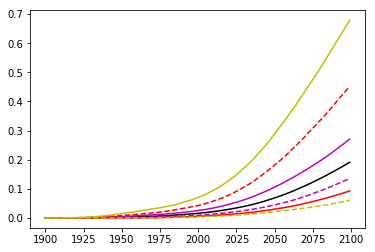

In [13]:
fp1 = plt.figure()
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_50pc,'k')
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_83pc,'m')
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_17pc,'--m')
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_95pc,'r')
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_05pc,'--r')
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_99pc,'y')
plt.plot(Time,SL_wTd_nos_base_ISSM_UCI_SU_RCP26_01pc,'--y')

fp1.savefig("Figures/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_percentiles_lines.pdf", bbox_inches='tight')


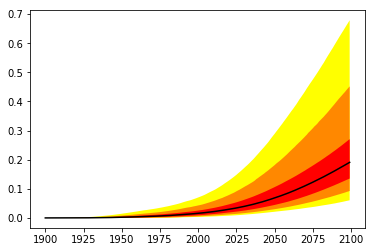

In [14]:
fp2 = plt.figure()
plt.fill_between(Time, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_01pc, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_99pc,facecolor='#ffff00')
plt.fill_between(Time, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_05pc, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_95pc,facecolor='#ff8800')
plt.fill_between(Time, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_17pc, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_83pc,facecolor='#ff0000')
plt.plot(Time, SL_wTd_nos_base_ISSM_UCI_SU_RCP26_50pc, 'k-')
plt.show()
fp2.savefig("Figures/SL_wTd_nos_base_ISSM_UCI_SU_RCP26_percentiles_shades.pdf", bbox_inches='tight')
